In [97]:
import gzip
import struct
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings("ignore")

In [98]:
def read_idx_gz(filename):
    with gzip.open(filename) as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)    
    

In [99]:
X = read_idx('train-images.idx3-ubyte')
y = read_idx('train-labels.idx1-ubyte')
X_test = read_idx_gz('t10k-images-idx3-ubyte.gz')
y_test = read_idx_gz('t10k-labels-idx1-ubyte.gz')

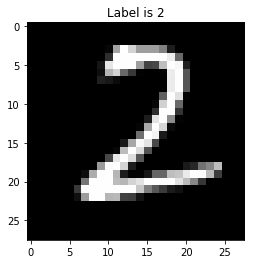

In [100]:
 label = y[7500]
 pixels = X[7500]
 plt.title('Label is {label}'.format(label=label))
 plt.imshow(pixels, cmap='gray')
 plt.show()

In [101]:
X = read_idx('train-images.idx3-ubyte')
y = read_idx('train-labels.idx1-ubyte')
X_test = read_idx_gz('t10k-images-idx3-ubyte.gz')
y_test = read_idx_gz('t10k-labels-idx1-ubyte.gz')

In [102]:
type(X_test)
X.shape, y.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [103]:
X = X.reshape(60000, 784)
X_test = X_test.reshape(10000,784) 


In [104]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X, y)

In [78]:
knn.score(X_test, y_test)

0.9705

In [114]:
ybar = knn.predict(X_test[0].reshape(1,-1))
y[0], ybar

(5, array([7], dtype=uint8))